# SPAM OR HAM MESSAGE CLASSIFICATION BY USING MACHINE LEARNING ALGORITHMS 
.....vishal yadav

# <img src="https://miro.medium.com/v2/resize:fit:1105/1*nBgCTU_hAVG00eYkcRf6Mw.png" width=750 height=200 />

# CONTENTS :

1. READING THE DATA
2. EXPLORATORY DATA ANALYSIS
       2.1 VISUALIZE DATASET
       2.2 DATA VISUALIZATION
       2.3 ADDING A NEW COLUMN LENGTH IN DATASET
3. CREATE TESTING AND TRAINING DATASET / DATA CLEANING
       3.1 REMOVE PUNCTUATION    
       3.2 REMOVE STOPWORDS
       3.3 COUNT VECTORIZER EXAMPLE
4. USING PIPELINE FOR APPLICATION
       4.1 APPLYING THE PREVIOUSLY THREE PROCESS TO OUR SPAM OR HAM EXAMPLES    
5. APPLYING COUNT VECTORIZER TO OUR MESSAGE LIST    
6. TRAINING THE MODEL WITH ALL DATASET
       6.1 USING NAIVE BAYES MULTINOMIALNB METHOD
7. DIVIDEING THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING       
8. EVALUATING THE MODEL       
       8.1 PREDECTING DATA ON TRAIN DATA BY USING CONFUSION MATRIX   
       8.2 PREDECTING DATA ON TEST DATA BY USING CONFUSION MATRIX
9. LET'S ADD ADDITIONAL FEATURE TF-IDF       
10. MODEL TRAINING BY USING MACHINE LEARNING ALGORITHM       
        10.1 - Finding the Accuracy of data by using Logistic Regression
        10.2 - Finding the Accuracy of data by using Decission Tree Classifier
        10.3 - Finding the Accuracy of data by using Random Forest Classifier
        10.4 - Finding the Accuracy of data by using Encemble Learning - Ada Boost Classifier
        10.5 - Predicting by using Naive Bayes classifier
       

## **INTRODUCTION** :

The exponential growth of digital communication has led to an increase in the volume of spam messages, posing a significant challenge to effective communication. Spam messages not only clutter inboxes but also pose security risks and can lead to phishing attacks and malware distribution. In response to this issue, the development of efficient spam filters has become crucial to distinguish legitimate messages (ham) from unwanted spam messages.

## **OBJECTIVES**:

Develop a robust machine learning classifier capable of accurately distinguishing spam from ham messages. Enhance communication efficiency by filtering out spam messages, ensuring users receive only relevant messages. Minimize security risks associated with spam, such as phishing attacks and malware distribution.

##  **Methodology**:
1. **Data Collection**: Gather a diverse dataset containing labeled examples of spam and ham messages.
2. **Data Preprocessing**: Clean and transform the text data, removing stopwords and handling special characters.
3. **Feature Extraction**: Convert textual data into numerical features using techniques like Bag-of-Words or TF-IDF.
4. **Model Selection**: Experiment with various machine learning algorithms such as Naive Bayes, SVM, and Random Forests to identify the best-performing model.
5. **Model Training and Evaluation**: Train the selected model on preprocessed data and evaluate its performance using metrics like accuracy and F1-score.
6. **Hyperparameter Tuning**: Fine-tune the model's hyperparameters to optimize performance using techniques like GridSearchCV.
7. **Cross-Validation**: Perform cross-validation to assess the model's generalization performance across different data subsets.
8. **Deployment**: Deploy the trained classifier in a real-world environment to classify incoming messages in real-time.


## PROBLEM STATEMENT
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: type contains the label (ham or spam) and text contains the raw text.

In [1]:
#for checking our current working directory in which we working
import os
os.getcwd()

'C:\\Users\\admin\\Downloads'

#### IMPORTING LIBRARIES

In [2]:
# importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings('ignore')

#  1. READING THE DATA

In [3]:
# reading the csv file
df=pd.read_csv(r'sms_spam.csv')
df

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


# 2. EXPLORATORY DATA ANALYSIS 

In [4]:
# for information of columns names dtype and for counts of null objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# for above 5 rows
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# fr belows 5 rows
df.tail()

,type,text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [7]:
#for stastical values
df.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [8]:
#checking the null values presented in our dataset
df.isnull().sum()

type    0
text    0
dtype: int64

### 2.1 VISUALIZE DATASET

In [9]:
# Let's see which message is the most popular ham/spam message
df.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

##### DATA IS CLEARED NO WE ABLE TO DO FURTHER PROCESS

### 2.2 DATA VISUALIZATION

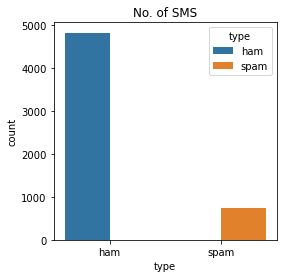

In [10]:
plt.figure(figsize = (4,4))
sns.countplot(x ="type", data = df, hue ="type")
plt.title("No. of SMS")
plt.show()

In [11]:
df["text"].value_counts()

Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.              

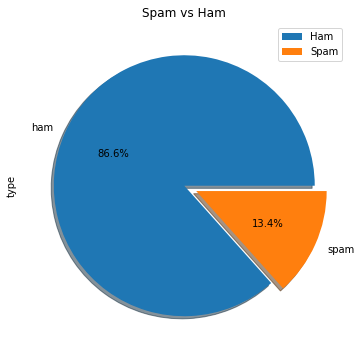

In [12]:
df["type"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

##### A lot of messages are actually not spam. About 86% of our dataset consists of normal messages

### 2.3 ADDING A NEW COLUMN LENGTH IN DATASET 

In [13]:
# Let's get the length of the messages
df['length'] = df['text'].apply(len)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

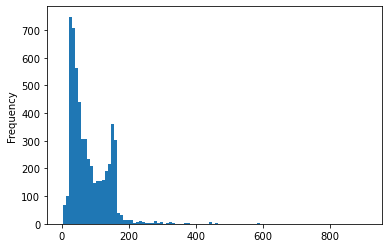

In [14]:
df['length'].plot(bins=100, kind='hist')

In [15]:
df.length.describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
# Let's see the longest message 43952
df[df['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### the above message was the longest message in our dataset

In [17]:
# Let seperate the data as ham and spam
ham = df[df['type']=='ham']
spam = df[df['type']=='spam']

In [18]:
ham.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [19]:
spam.head()

,type,text,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


<AxesSubplot:ylabel='Frequency'>

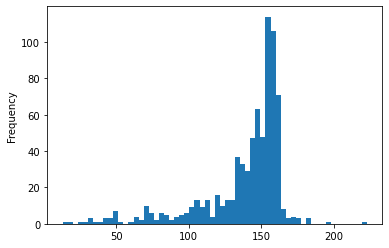

In [20]:
# Let visualize it by hist plot
spam['length'].plot(bins=60, kind='hist') 


<AxesSubplot:ylabel='Frequency'>

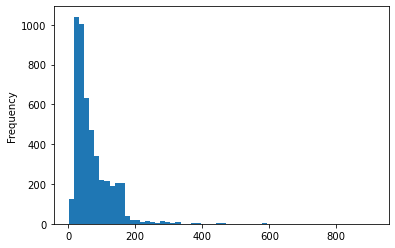

In [21]:
ham['length'].plot(bins=60, kind='hist') 

In [22]:
# let see the percentage wise distribution of ham and spam in dataframe
print( 'Spam percentage =', (len(spam) / len(df) )*100,"%")
print( 'Ham percentage =', (len(ham) / len(df) )*100,"%")

Spam percentage = 13.40150699677072 %
Ham percentage = 86.59849300322928 %


### IN OUR DATASET Ham MESSAGES IS 86.5%  WHICH IS VERY LARGE AMOUNT

# 3. CREATE TESTING AND TRAINING DATASET / DATA CLEANING

### 3.1 REMOVE PUNCTUATION

In [23]:
# importing string punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# Lets test the data by some value before using it
text='Hello Mr. Future, I am a beginner learner in a field of Machine Learning now!'

In [25]:
# let remove the punctuation from the text
text_punc_removed=[char for char in text if char not in string.punctuation]
print(text_punc_removed)

['H', 'e', 'l', 'l', 'o', ' ', 'M', 'r', ' ', 'F', 'u', 't', 'u', 'r', 'e', ' ', 'I', ' ', 'a', 'm', ' ', 'a', ' ', 'b', 'e', 'g', 'i', 'n', 'n', 'e', 'r', ' ', 'l', 'e', 'a', 'r', 'n', 'e', 'r', ' ', 'i', 'n', ' ', 'a', ' ', 'f', 'i', 'e', 'l', 'd', ' ', 'o', 'f', ' ', 'M', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'L', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'n', 'o', 'w']


In [26]:
# joining the character to make a sentence
test_joined = ''.join(text_punc_removed)
test_joined

'Hello Mr Future I am a beginner learner in a field of Machine Learning now'

#### AS WE SEE NOW ALL PUNCTUATION GET REMOVED SO WE USE IT NOW

### 3.2 REMOVE STOPWORDS

In [71]:
# Download stopwords Package to execute this command
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
print()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# let conver all to lower case
Test_punc_removed_join_clean = [word for word in test_joined.split() if word.lower() not in stopwords.words('english')]

In [29]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello',
 'Mr',
 'Future',
 'beginner',
 'learner',
 'field',
 'Machine',
 'Learning']

### 3.3 COUNT VECTORIZER EXAMPLE

In [30]:
# IMPORT THE COUNT VECTORIZER LIBRARY
from sklearn.feature_extraction.text import CountVectorizer
sample_data = [' This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [31]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [32]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# 4. USING PIPELINE FOR APPLICATION 

### 4.1 APPLYING THE PREVIOUSLY THREE PROCESS TO OUR SPAM OR HAM EXAMPLES

In [33]:
# Define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [34]:
# Test the newly added function
spam_df_clean = df['text'].apply(message_cleaning)

In [35]:
# Let print a message by cleaning
print(spam_df_clean[0])

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']


In [36]:
# Original message without any filter
print(df['text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


# 5. APPLYING COUNT VECTORIZER TO OUR MESSAGE LIST

In [37]:
# IMPORT LIBRARY 
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)

# PASSING OUR Texts 
spamham_countvectorizer = vectorizer.fit_transform(df['text'])

In [73]:
#print(vectorizer.get_feature_names())


In [39]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
spamham_countvectorizer.shape

(5574, 11401)

# 6. TRAINING THE MODEL WITH ALL DATASET

### 6.1 USING NAIVE BAYES MULTINOMIALNB METHOD

In [41]:
# Importing library multinomialDB from naive bayes
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = df['type'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [42]:
# testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample = ["""'Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks""","""Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"""]

testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [43]:
# PREDECTING ABOVE TEXT WAS HAM/SPAM 
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array(['ham', 'spam'], dtype='<U4')

In [44]:
# Mini Challenge!
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [45]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array(['ham', 'ham'], dtype='<U4')

# 7. DIVIDEING THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [46]:
x = spamham_countvectorizer
y = label

In [47]:
# x will always required 2d 
x.shape

(5574, 11401)

In [48]:
# y is our target colum in 1d
y.shape

(5574,)

In [49]:
# splitinhg the data as test and train data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(xtrain, ytrain)

MultinomialNB()

# 8. EVALUATING THE MODEL

In [51]:
# this library help to make a classificaion reports
from sklearn.metrics import classification_report, confusion_matrix

###  8.1 PREDECTING DATA ON TRAIN DATA BY USING CONFUSION MATRIX

<AxesSubplot:>

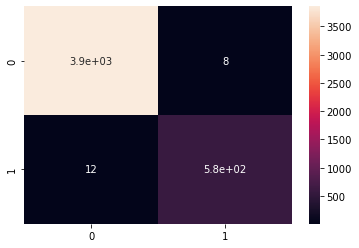

In [52]:
y_predict_train = NB_classifier.predict(xtrain)
y_predict_train
cm = confusion_matrix(ytrain, y_predict_train)
sns.heatmap(cm, annot=True)

### 8.2 PREDECTING DATA ON TEST DATA BY USING CONFUSION MATRIX

<AxesSubplot:>

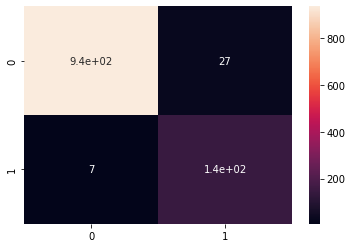

In [53]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(xtest)
cm = confusion_matrix(ytest, y_predict_test)
sns.heatmap(cm, annot=True)

In [54]:
cm

array([[936,  27],
       [  7, 145]], dtype=int64)

In [55]:
# Printing a classification report

nbaccuracy = round(accuracy_score(ytest, y_predict_test) * 100, 2)
print(f'NB Classifier Accuracy on test data {nbaccuracy}')
print(classification_report(ytest, y_predict_test))
print(f'The accuracy achieved from NB Classifier on test data is : {nbaccuracy}\n\n')


NB Classifier Accuracy on test data 96.95
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       963
        spam       0.84      0.95      0.90       152

    accuracy                           0.97      1115
   macro avg       0.92      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115

The accuracy achieved from NB Classifier on test data is : 96.95




# 9. LET'S ADD ADDITIONAL FEATURE TF-IDF

In [56]:
spamham_countvectorizer

<5574x11401 sparse matrix of type '<class 'numpy.int64'>'
	with 50544 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5574, 11401)


In [74]:
#print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

<AxesSubplot:>

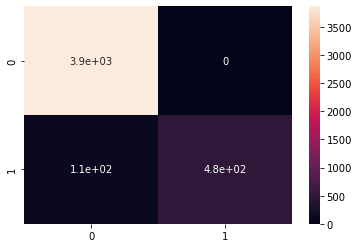

In [59]:
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [60]:
NB_classifier_accuracy = round(accuracy_score(y_test, y_predict_test) * 100, 2)
print(f'NB Classifier Accuracy {NB_classifier_accuracy}')
print(classification_report(y_test, y_predict_test))
print(f'The accuracy achieved from NB Classifier on test data is : {NB_classifier_accuracy}\n\n')


NB Classifier Accuracy 74.62
              precision    recall  f1-score   support

         ham       0.86      0.84      0.85       962
        spam       0.12      0.14      0.13       153

    accuracy                           0.75      1115
   macro avg       0.49      0.49      0.49      1115
weighted avg       0.76      0.75      0.75      1115

The accuracy achieved from NB Classifier on test data is : 74.62




# 10. MODEL TRAINING BY USING MACHINE LEARNING ALGORITHM

### 10.1 - Finding the Accuracy of data by using Logistic Regression

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(xtrain, ytrain)

LogisticRegression(random_state=42)

In [62]:
y_pred = logistic_regression_model.predict(xtest)
acc_logreg = round(accuracy_score(y_pred, ytest) * 100, 2)
print(f'Logistic Regression accuracy {acc_logreg}')
print(classification_report(ytest,y_pred))                 #printing the report of classification
print(f'The accuracy achieved from Logistic Regression is : {acc_logreg}\n\n')

Logistic Regression accuracy 97.49
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       963
        spam       1.00      0.82      0.90       152

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

The accuracy achieved from Logistic Regression is : 97.49




### 10.2 - Finding the Accuracy of data by using Decission Tree Classifier

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier(random_state=42)
decisiontree_model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [64]:
y_pred = decisiontree_model.predict(xtest)
acc_decisiontree = round(accuracy_score(ytest,y_pred) * 100, 2)
print(f'Decision Tree Classifier accuracy {acc_decisiontree: .2f}')
print(classification_report(ytest, y_pred))
print(f'The accuracy achieved from Decision Tree Classifier is : {acc_decisiontree}\n\n')

Decision Tree Classifier accuracy  96.95
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       963
        spam       0.92      0.85      0.88       152

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

The accuracy achieved from Decision Tree Classifier is : 96.95




### 10.3 - Finding the Accuracy of data by using Random Forest Classifier

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [66]:
predictions = random_forest_model.predict(xtest)
ranfor_accuracy = accuracy_score(ytest, predictions)
print(f"Random Forest Classifier Accuracy: {ranfor_accuracy:.2f}")
print(classification_report(ytest, predictions))
print(f'The accuracy achieved from Random Forest Classifier is : {ranfor_accuracy*100}\n\n')

Random Forest Classifier Accuracy: 0.97
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       963
        spam       1.00      0.75      0.86       152

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

The accuracy achieved from Random Forest Classifier is : 96.59192825112108




### 10.4 - Finding the Accuracy of data by using Encemble Learning - Ada Boost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
ada_boost_accuracy = accuracy_score(ytest, ypred)
print(f'Ada Boost Accuracy: {ada_boost_accuracy*100:.2f}')
print(classification_report(ytest,ypred))
print(f'The accuracy achieved from Ada Boost Classifier is : {ada_boost_accuracy*100}\n\n')

Ada Boost Accuracy: 96.59
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       963
        spam       0.97      0.77      0.86       152

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

The accuracy achieved from Ada Boost Classifier is : 96.59192825112108




### 10.5 - Predicting by using Naive Bayes classifier

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
classification_rep = classification_report(ytest, ypred)
print(f'The accuracy achieved from Ada Boost Classifier is : {accuracy*100}\n\n')
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f'The accuracy achieved from Naive Bayes Classifier is : {accuracy*100}\n\n')


The accuracy achieved from Ada Boost Classifier is : 96.59192825112108



Confusion Matrix:
 [[960   3]
 [ 35 117]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       963
        spam       0.97      0.77      0.86       152

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

The accuracy achieved from Naive Bayes Classifier is : 96.59192825112108




### we got the accuracy of different modules of classifier

In [69]:
print(f'The accuracy achieved from NB Classifier on test data is : {NB_classifier_accuracy}\n')
print(f'The accuracy achieved from NB Classifier on train data is : {nbaccuracy}\n')
print(f'The accuracy achieved from Logistic Regression is : {acc_logreg}\n')
print(f'The accuracy achieved from Decision Tree Classifier is : {acc_decisiontree}\n')
print(f'The accuracy achieved from Random Forest Classifier is : {ranfor_accuracy*100}\n')
print(f'The accuracy achieved from Ada Boost Classifier is : {ada_boost_accuracy*100}\n')
print(f'The accuracy achieved from Naive Bayes Classifier is : {accuracy*100}\n')


The accuracy achieved from NB Classifier on test data is : 74.62

The accuracy achieved from NB Classifier on train data is : 96.95

The accuracy achieved from Logistic Regression is : 97.49

The accuracy achieved from Decision Tree Classifier is : 96.95

The accuracy achieved from Random Forest Classifier is : 96.59192825112108

The accuracy achieved from Ada Boost Classifier is : 96.59192825112108

The accuracy achieved from Naive Bayes Classifier is : 96.59192825112108



# CONCLUSION

In [70]:
print(("*")*125)
print(f' As we see during the prediction the accuracy achieved from Logistic Regression classifiern is {acc_logreg} Which was much good as compare to another, So we can go throung Logistic Regression modules for prediction')
print(("*")*125)
print(f"\tBased on the above accuracy scores, we should go ahead with \n\nNB Classifier on test data is : {NB_classifier_accuracy},\n\nNB Classifier on train data is : {nbaccuracy},\n\nLogistic Regression :{acc_logreg},\n\nDecision Tree Classifier : {acc_decisiontree},\n\nRandom Forest Classifier : {ranfor_accuracy*100},\n\nAccuracy with Ada Boost Classifier : {ada_boost_accuracy*100}\n\nAccuracy with Naive Bayes Classifier : {accuracy*100}\n\n The best predictive model for the above dataset is Logistic Regression Classifier and its Accuracy is {acc_logreg}. So Logistic Regression Classifier is best for Spam and Ham message classification ")
print(("*")*125)

print(("*")*125)


*****************************************************************************************************************************
 As we see during the prediction the accuracy achieved from Logistic Regression classifiern is 97.49 Which was much good as compare to another, So we can go throung Logistic Regression modules for prediction
*****************************************************************************************************************************
	Based on the above accuracy scores, we should go ahead with 

NB Classifier on test data is : 74.62,

NB Classifier on train data is : 96.95,

Logistic Regression :97.49,

Decision Tree Classifier : 96.95,

Random Forest Classifier : 96.59192825112108,

Accuracy with Ada Boost Classifier : 96.59192825112108

Accuracy with Naive Bayes Classifier : 96.59192825112108

 The best predictive model for the above dataset is Logistic Regression Classifier and its Accuracy is 97.49. So Logistic Regression Classifier is best for Spam and Ham me